In [20]:
# import libraries
import re
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy
from spacy.matcher import Matcher
from spacy.tokens import Span
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

import numpy as np

In [ ]:
!python -m spacy download de_core_news_md

In [62]:
# load the file with Discounter List
data = pd.read_csv('Einzelhandel.csv')

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Einzelhandel            10 non-null     object 
 1   Hauptsitz               10 non-null     object 
 2   Gegründet               10 non-null     int64  
 3   Mitarbeiter             10 non-null     int64  
 4   Umsatz ( Mio EUR)       10 non-null     int64  
 5   Umsatz per Mitarbeiter  10 non-null     float64
 6   CEO                     10 non-null     object 
 7   www                     10 non-null     object 
dtypes: float64(1), int64(3), object(4)
memory usage: 772.0+ bytes


In [64]:
print(data)

      Einzelhandel           Hauptsitz  Gegründet  Mitarbeiter  \
0             Tedi        Dortmund, DE       2004        22871   
1           Action  Zwaagdijk-Oost, NL       1993        70000   
2        Woolworth            Unna, DE       2010         7814   
3              Kik           Bönen, DE       1994        32000   
4             Hema       Amsterdam, NL       1926        17000   
5            Pepco          London, UK       1999        30000   
6  Pfennigpfeiffer       Landsberg, DE       1990          800   
7         Mäc Geiz       Landsberg, DE       1994         1500   
8      T. Phillips      Bissendorf, DE       1986         4200   
9         EuroShop      Dettelbach, DE       2004         3000   

   Umsatz ( Mio EUR)  Umsatz per Mitarbeiter                  CEO  \
0               3000                    0.13        Petar Burazin   
1              11300                    0.16          Hajir Hajji   
2                642                    0.08          Roman Heini 

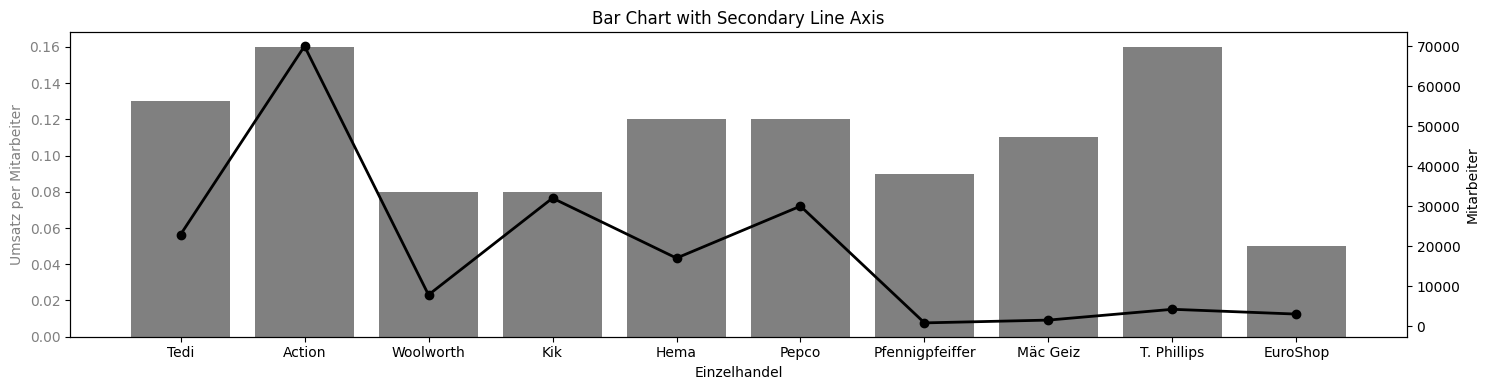

In [65]:
# Create figure and a main axis object
fig, ax1 = plt.subplots(figsize=(15, 4))

# Plot the bar chart on the primary axis (ax1)
ax1.bar(data["Einzelhandel"], data["Umsatz per Mitarbeiter"], color='grey', label='Bar Data (Primary)')
ax1.set_xlabel('Einzelhandel')
ax1.set_ylabel('Umsatz per Mitarbeiter', color='grey')
ax1.tick_params(axis='y', labelcolor='grey')

# Create a secondary axis object that shares the same x-axis
ax2 = ax1.twinx()

# Plot the line chart on the secondary axis (ax2)
# 'ax1.get_xticks()' is used to align the line data points with the center of the bars
ax2.plot(ax1.get_xticks(), data["Mitarbeiter"], color='black', marker='o', linestyle='-', linewidth=2, label='Line Data (Secondary)')
ax2.set_ylabel('Mitarbeiter', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add a title and show the plot
plt.title('Bar Chart with Secondary Line Axis')
fig.tight_layout() # Ensures labels don't get clipped

plt.show()

In [66]:
nlp = spacy.load("de_core_news_md")

In [67]:
# read text file into pandas DataFrame
df_tedi = pd.read_table("wiki_tedi.txt", delimiter=" ")
df_woolworth = pd.read_table("wiki_woolworth.txt", delimiter=" ")
df_pepco = pd.read_table("wiki_pepco.txt", delimiter=" ")

# display DataFrame
print(df_tedi)
print(df_woolworth)
print(df_pepco)

Empty DataFrame
Columns: [TEDi, (vormals, T€Di, als, Abkürzung, für, Top, Euro, Discount), ist, ein, deutscher, Nonfood-Händler, mit, mehr, als.1, 3000, Filialen, (Stand, Oktober, 2023), in, Deutschland,, Österreich,, Slowenien,, der, Slowakei,, Spanien,, Kroatien,, Italien,, Polen,, Portugal,, Ungarn, und, Frankreich., Im, Sortiment, sind, Ge-, und.1, Verbrauchsartikel, des, täglichen, Bedarfs, zu, finden., Es, umfasst, neben, Haushalts-,, Party-,, Heimwerker-, und.2, Elektroartikeln, auch, Schreib-, und.3, Spielwaren, sowie, Drogerie-, und.4, Kosmetikprodukte., Dazu, kommen, saisonale, Artikel, und.5, Markenware.Tedi, wurde, von, der.1, Tengelmann-Gruppe, mit.1, der.2, Idee, gegründet,, das, Konzept, der.3, Ein-Dollar-Läden, auch.1, in.1, Deutschland, anzubieten., Das, Unternehmen, wurde.1, als.2, Ableger, der.4, Tengelmann-Textiltochter, KiK, gegründet., Tengelmann, hielt, bis, 30., April, 2021, als.3, ...]
Index: []

[0 rows x 619 columns]
Empty DataFrame
Columns: [Die, Woolworth, 

In [68]:
# convert data frame to string
dfs_tedi=(df_tedi.to_string())
dfs_pepco=(df_pepco.to_string())
dfs_woolworth=(df_woolworth.to_string())

In [69]:
doc_tedi = nlp(dfs_tedi)
doc_woolworth = nlp(dfs_woolworth)
doc_pepco = nlp(dfs_pepco)

In [71]:
# Similarity of two documents
print('Tedi and Woolworth wiki text similarity is:',doc_tedi.similarity(doc_woolworth))
print('Tedi and Pepco wiki text similarity is:',doc_tedi.similarity(doc_pepco))
print('Pepco and Woolworth wiki text similarity is:',doc_pepco.similarity(doc_woolworth))

Tedi and Woolworth wiki text similarity is: 0.9942319989204407
Tedi and Pepco wiki text similarity is: 0.9935230612754822
Pepco and Woolworth wiki text similarity is: 0.9926754236221313
